Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Random Forest Parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}
Train Accuracy: 0.9955
Test Accuracy: 0.9107
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2
           8       0.50      1.00      0.67         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         1
          12 

/Users/aninditatripathy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aninditatripathy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aninditatripathy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

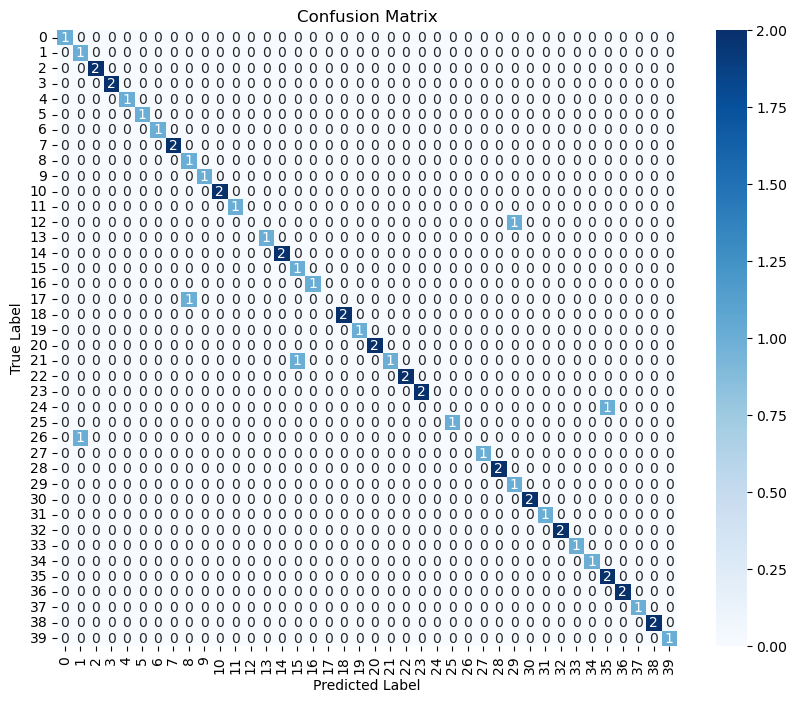

In [8]:
#Random forest for 15m

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
data = pd.read_csv('norm_newfocus15m.csv')  # Replace with the actual file name

# Feature columns
feature_columns = ['R', 'G', 'B']

# Function to balance the data by downsampling each class to the minimum number of samples
def balance_data(data):
    min_count = data['tag'].value_counts().min()
    balanced_data = data.groupby('tag').apply(lambda x: x.sample(min_count, random_state=42)).reset_index(drop=True)
    return balanced_data

# Balance the data
balanced_data = balance_data(data)

# Split the data into features and labels
X = balanced_data[feature_columns]
y = balanced_data['tag']

# Perform the train/test split in a stratified manner
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid with regularization
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [5, 10, 15],  # Maximum depth of each tree
    'min_samples_split': [10, 20, 30],  # Minimum number of samples required to split a node
    'min_samples_leaf': [5, 10, 15],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider at each split
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_rf = grid_search.best_estimator_
print(f"Best Random Forest Parameters: {grid_search.best_params_}")

# Train the model with the best parameters
best_rf.fit(X_train_scaled, y_train)

# Predict on the train set
y_train_pred = best_rf.predict(X_train_scaled)

# Predict on the test set
y_test_pred = best_rf.predict(X_test_scaled)

# Evaluate the classifier
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Display the classification report for the test set
print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Random Forest Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}
Train Accuracy: 0.9953
Test Accuracy: 0.9656
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.88      0.93         8
           2       1.00      0.88      0.93         8
           3       0.89      1.00      0.94         8
           4       1.00      1.00      1.00         8
           5       0.89      1.00      0.94         8
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         8
           9       0.89      1.00      0.94         8
          10       0.89      1.00      0.94         8
          11       1.00      0.75      0.86         8
          12 

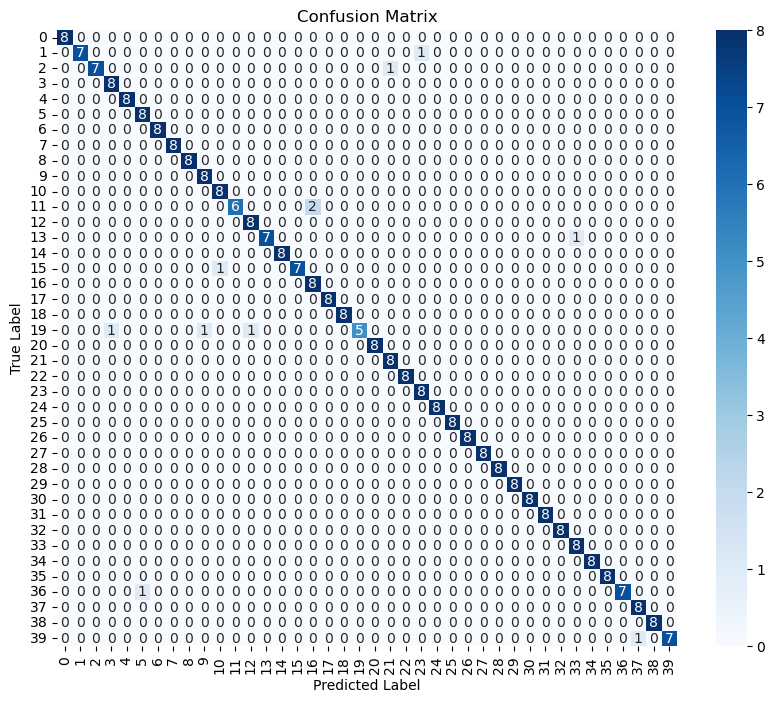

In [9]:
#Random forest for 20m

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
data = pd.read_csv('norm_newfocus20m.csv')  # Replace with the actual file name

# Feature columns
feature_columns = ['R', 'G', 'B']

# Function to balance the data by downsampling each class to the minimum number of samples
def balance_data(data):
    min_count = data['tag'].value_counts().min()
    balanced_data = data.groupby('tag').apply(lambda x: x.sample(min_count, random_state=42)).reset_index(drop=True)
    return balanced_data

# Balance the data
balanced_data = balance_data(data)

# Split the data into features and labels
X = balanced_data[feature_columns]
y = balanced_data['tag']

# Perform the train/test split in a stratified manner
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid with regularization
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [5, 10, 15],  # Maximum depth of each tree
    'min_samples_split': [10, 20, 30],  # Minimum number of samples required to split a node
    'min_samples_leaf': [5, 10, 15],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider at each split
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_rf = grid_search.best_estimator_
print(f"Best Random Forest Parameters: {grid_search.best_params_}")

# Train the model with the best parameters
best_rf.fit(X_train_scaled, y_train)

# Predict on the train set
y_train_pred = best_rf.predict(X_train_scaled)

# Predict on the test set
y_test_pred = best_rf.predict(X_test_scaled)

# Evaluate the classifier
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Display the classification report for the test set
print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Random Forest Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 300}
Train Accuracy: 0.9929
Test Accuracy: 0.9679
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.88      1.00      0.93         7
           2       1.00      1.00      1.00         7
           3       0.78      1.00      0.88         7
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         7
          12 

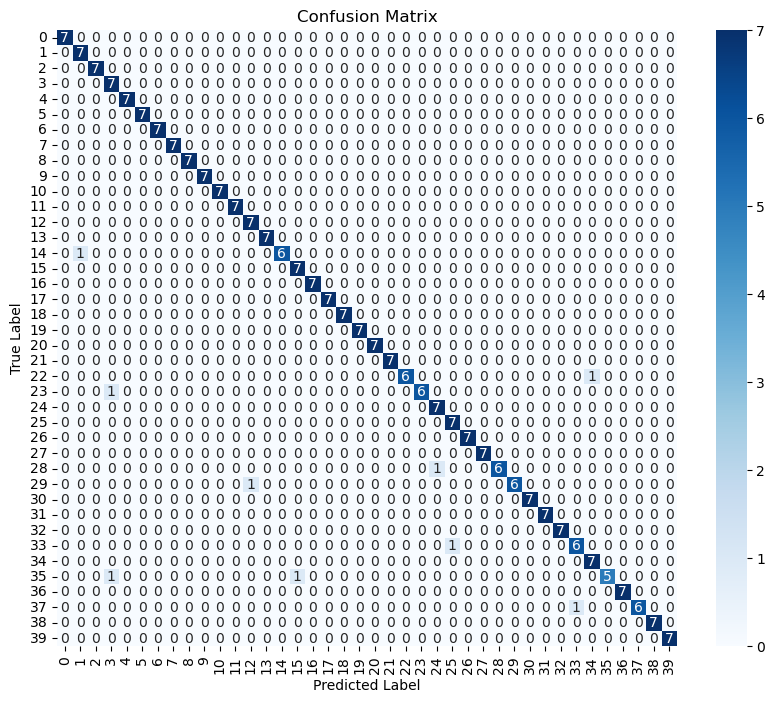

In [11]:
#Random forest for 25m

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
data = pd.read_csv('norm_newfocus25m.csv')  # Replace with the actual file name

# Feature columns
feature_columns = ['R', 'G', 'B']

# Function to balance the data by downsampling each class to the minimum number of samples
def balance_data(data):
    min_count = data['tag'].value_counts().min()
    balanced_data = data.groupby('tag').apply(lambda x: x.sample(min_count, random_state=42)).reset_index(drop=True)
    return balanced_data

# Balance the data
balanced_data = balance_data(data)

# Split the data into features and labels
X = balanced_data[feature_columns]
y = balanced_data['tag']

# Perform the train/test split in a stratified manner
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid with regularization
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [5, 10, 15],  # Maximum depth of each tree
    'min_samples_split': [10, 20, 30],  # Minimum number of samples required to split a node
    'min_samples_leaf': [5, 10, 15],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider at each split
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_rf = grid_search.best_estimator_
print(f"Best Random Forest Parameters: {grid_search.best_params_}")

# Train the model with the best parameters
best_rf.fit(X_train_scaled, y_train)

# Predict on the train set
y_train_pred = best_rf.predict(X_train_scaled)

# Predict on the test set
y_test_pred = best_rf.predict(X_test_scaled)

# Evaluate the classifier
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Display the classification report for the test set
print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Random Forest Parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}
Train Accuracy: 0.8163
Test Accuracy: 0.6448
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.62      0.31      0.42        16
           1       0.70      0.44      0.54        16
           2       0.69      0.65      0.67        17
           3       0.64      0.94      0.76        17
           4       0.77      0.62      0.69        16
           5       0.88      0.44      0.58        16
           6       0.53      0.50      0.52        16
           7       0.88      0.82      0.85        17
           8       0.54      0.81      0.65        16
           9       0.80      0.75      0.77        16
          10       0.81      0.76      0.79        17
          11       0.52      0.69      0.59        16
          12 

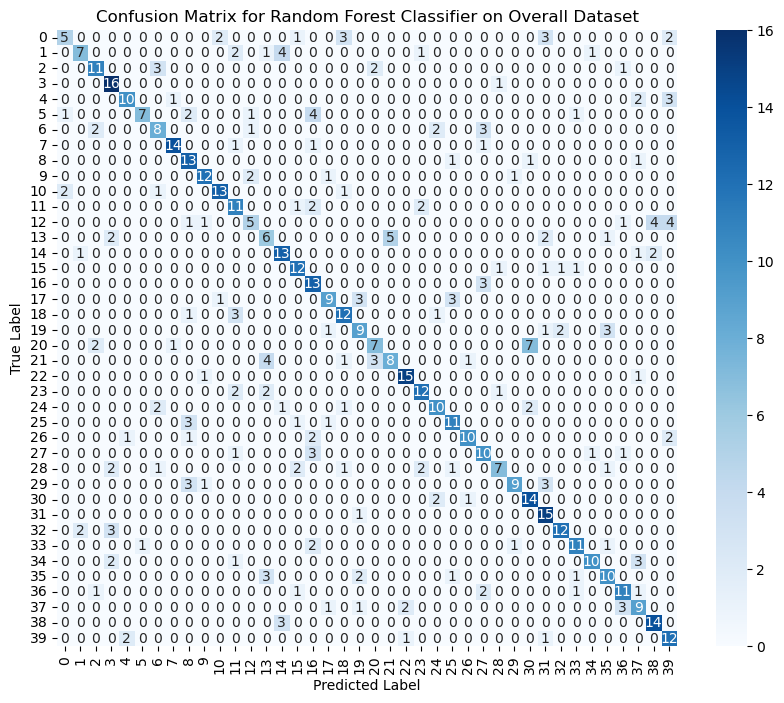

In [12]:
#Random Forest for overall data

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets from the CSV files
data1 = pd.read_csv('norm_newfocus15m.csv')  # Replace with the actual file name
data2 = pd.read_csv('norm_newfocus20m.csv')  # Replace with the actual file name
data3 = pd.read_csv('norm_newfocus25m.csv')  # Replace with the actual file name

# Combine the datasets into one DataFrame
combined_data = pd.concat([data1, data2, data3], ignore_index=True)

# Feature columns
feature_columns = ['R', 'G', 'B']

# Function to balance the data by downsampling each class to the minimum number of samples
def balance_data(data):
    min_count = data['tag'].value_counts().min()  # Get the minimum count of samples per class
    balanced_data = data.groupby('tag').apply(lambda x: x.sample(min_count, random_state=42)).reset_index(drop=True)
    return balanced_data

# Balance the combined data
balanced_data = balance_data(combined_data)

# Split the balanced data into features and labels
X = balanced_data[feature_columns]
y = balanced_data['tag']

# Perform the train/test split in a stratified manner
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid with regularization
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [5, 10, 15],  # Maximum depth of each tree
    'min_samples_split': [10, 20, 30],  # Minimum number of samples required to split a node
    'min_samples_leaf': [5, 10, 15],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider at each split
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_rf = grid_search.best_estimator_
print(f"Best Random Forest Parameters: {grid_search.best_params_}")

# Train the model with the best parameters
best_rf.fit(X_train_scaled, y_train)

# Predict on the train set
y_train_pred = best_rf.predict(X_train_scaled)

# Predict on the test set
y_test_pred = best_rf.predict(X_test_scaled)

# Evaluate the classifier
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Display the classification report for the test set
print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix for Random Forest Classifier on Overall Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()